In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [4]:
def read_excel_sheets(path):
    # Open the excel file
    xl = pd.ExcelFile(path)
    # Create an empty list to store the dataframes
    dfs = []
    # Loop through each sheet in the excel file
    for sheet_name in xl.sheet_names:
        # Read the sheet into a dataframe
        df = pd.read_excel(xl, sheet_name)
        # Add a column with the sheet name
        # First parse the sheet name so it´s a date. It comes in the format: "short month day year"
        if sheet_name[0:4] == "Aprl":
            sheet_name = "April"+sheet_name[4:]
        df['Date'] = pd.to_datetime(sheet_name, format='mixed', infer_datetime_format=True)
        # Append the dataframe to the list
        dfs.append(df)
    # Concatenate all the dataframes into a single dataframe
    result = pd.concat(dfs, ignore_index=True)
    return result

In [28]:
dfs = []
xc = ["LUACTRUU Index 2018-2020.xlsx", "LUACTRUU Index 2023-2021.xlsx", "LUACTRUU Index Data (2015-2013).xlsx", "LUUACTRUU Index 2017-2016.xlsx"]
for i in xc:
    dfs.append(read_excel_sheets(i))
data = pd.concat(dfs, ignore_index=True)

data.head()


C:\Users\aolivie\AppData\Local\Temp\ipykernel_1084\330719559.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(sheet_name, format='mixed', infer_datetime_format=True)
C:\Users\aolivie\AppData\Local\Temp\ipykernel_1084\330719559.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(sheet_name, format='mixed', infer_datetime_format=True)
C:\Users\aolivie\AppData\Local\Temp\ipykernel_1084\330719559.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future ve

,ISIN,Description,Ccy,Price,YTW,OAD,Par Val,MV,Weight,Yield to Maturity,Issuer,Maturity,Maturity.1,Index Rating (String),BCLASS 2,Cpn,Payment rank,Date,Coupon,payment rank
0,US035242AN64,ABIBB 4.9 02/01/46,USD,112.306,4.146142,15.783,11000000.0,12606689.0,0.245183,4.152812,ANHEUSER-BUSCH INBEV FIN,28.030556,02/01/2046,A3,INDUSTRIAL,4.900,Sr Unsecured,2018-01-19,NaN,NaN
1,US36164QNA21,GE 4.418 11/15/35,USD,103.110,4.168546,12.446,11406510.0,11852241.0,0.230510,4.168546,GE CAPITAL INTL FUNDING,17.819445,11/15/2035,A2,FINANCIAL_INSTITUTIONS,4.418,Sr Preferred,2018-01-19,NaN,NaN
2,US035242AP13,ABIBB 3.65 02/01/26,USD,101.136,3.482374,6.781,11000000.0,11313446.0,0.220031,3.486462,ANHEUSER-BUSCH INBEV FIN,8.030556,02/01/2026,A3,INDUSTRIAL,3.650,Sr Unsecured,2018-01-19,NaN,NaN
3,US035242AJ52,ABIBB 2.65 02/01/21,USD,99.819,2.712440,2.851,7500000.0,7579728.0,0.147415,2.712440,ANHEUSER-BUSCH INBEV FIN,3.030555,02/01/2021,A3,INDUSTRIAL,2.650,Sr Unsecured,2018-01-19,NaN,NaN
4,US38141GFD16,GS 6 ¾ 10/01/37,USD,130.954,4.386269,12.018,5545000.0,7374725.0,0.143428,4.386269,GOLDMAN SACHS GROUP INC,19.697222,10/01/2037,BAA2,FINANCIAL_INSTITUTIONS,6.750,Subordinated,2018-01-19,NaN,NaN


In [ ]:
# merge two columns, Payment Rank and Payment rank into the same column named Payment Rank. Then remove Payment rank
data['Payment Rank'] = data['Payment rank'].fillna(data['payment rank'])
data = data.drop(columns=['Payment rank', 'payment rank'])
# now merge the columns ISIN and Unnamed: 0 into the same column named ISIN. Then remove Unnamed: 0
data['Cpn'] = data['Cpn'].fillna(data['Coupon'])
data = data.drop(columns=['Coupon'])

data = data.rename(columns={'Maturity.1': 'Maturity Date'})

data.to_csv('LUACTRUU.csv', index=False)

# Prueba de concepto

In [43]:

data = pd.read_csv('LUACTRUU.csv')
len(data)

732681

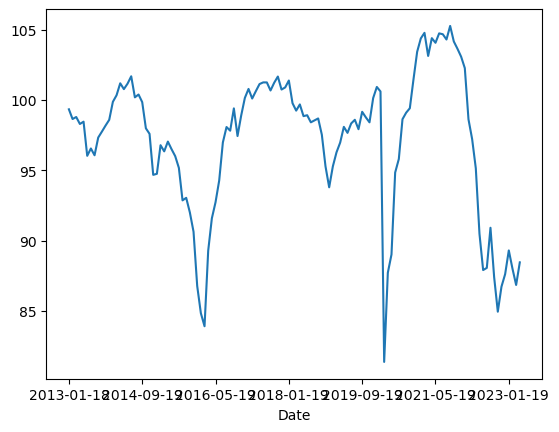

In [5]:
# now create a subset of data with only a few unique ISINs. About 5%
data_subset = data.sample(frac=0.5, replace=False, random_state=1)


# now create a plot of the date and average price for each date. Also add a line for the average price for all dates and all price values
data.groupby('Date')['Price'].mean().plot()
plt.show()

# now create a new df with the average price for each date
data_avg = data.groupby('Date')['Price'].mean().reset_index()


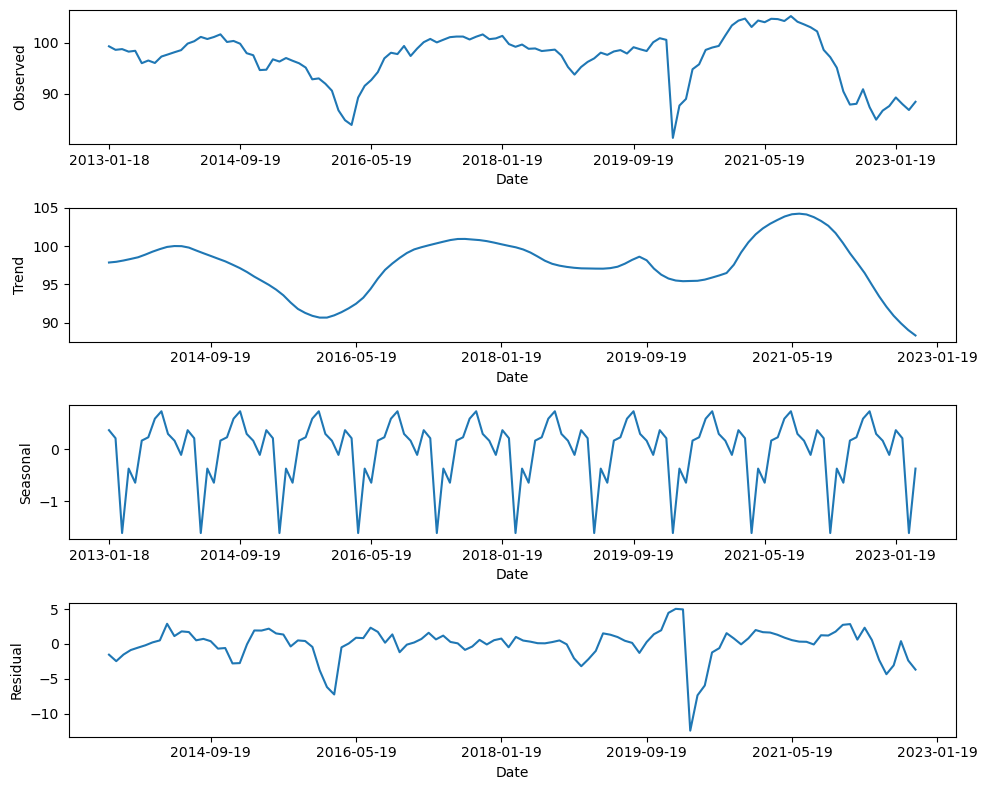

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# set data_avg index to Date
data_avg = data_avg.set_index('Date')

result = seasonal_decompose(data_avg['Price'], model='additive', period=12)

# now plot the result
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

In [7]:
y = data['Price']
X = data.select_dtypes(include='number').drop(columns=['Price'])

# now scale the data
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

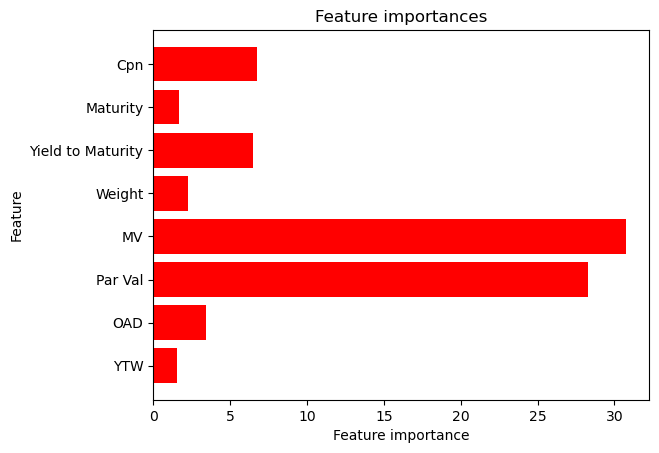

In [14]:
# create a linear regression model
model = LinearRegression()

model.fit(X_scaled, y)

# absolute value of coefficients
coefs = pd.Series(abs(model.coef_))

plt.figure()
plt.title("Feature importances")
plt.barh(X.columns, coefs, color="r", align="center")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [8]:
data.head()

,ISIN,Description,Ccy,Price,YTW,OAD,Par Val,MV,Weight,Yield to Maturity,Issuer,Maturity,Maturity Date,Index Rating (String),BCLASS 2,Cpn,Date,Payment Rank
0,US852061AK63,S 9 11/15/18,USD,124.500,4.209298,4.750172,3000000.0,3.783000e+06,0.325330,4.209298,SPRINT COMMUNICATIONS INC,5.822222,11/15/2018,BA3,INDUSTRIAL,9.000,2013-01-18,Sr Unsecured
1,US404121AC95,HCA 6 ½ 02/15/20,USD,113.750,4.229491,5.778464,3000000.0,3.495917e+06,0.300641,4.229491,HCA INC,7.072222,02/15/2020,BA2,INDUSTRIAL,6.500,2013-01-18,1st lien
2,US761735AN93,PTVE 5 ¾ 10/15/20,USD,103.750,4.988087,5.283333,3250000.0,3.429495e+06,0.294929,5.154282,REYNOLDS GRP ISS/REYNOLD,7.738889,10/15/2020,B1,INDUSTRIAL,5.750,2013-01-18,1st lien
3,US319963BB96,FDC 12 ⅝ 01/15/21,USD,107.250,11.105545,5.113684,2999994.0,3.411077e+06,0.293345,11.226144,FIRST DATA CORP,7.988889,01/15/2021,CAA1,INDUSTRIAL,12.625,2013-01-18,Sr Unsecured
4,US458204AH70,INTEL 11 ¼ 02/04/17,USD,106.125,4.812095,0.084089,2805000.0,3.111797e+06,0.267608,9.390606,INTELSAT LUXEMBOURG SA,4.041667,02/04/2017,CAA3,INDUSTRIAL,11.250,2013-01-18,Sr Unsecured


In [44]:
# Using the price, for each ISIN, calculate the return using the formula: (Price(t) - Price(t-1)) / Price(t-1)
# First, sort the data by ISIN and Date
data = data.sort_values(['ISIN', 'Date'])
data['R1M'] = data.groupby('ISIN')['Price'].pct_change()
data['R3M'] = data.groupby('ISIN')['Price'].pct_change(3)
data['R6M'] = data.groupby('ISIN')['Price'].pct_change(6)
data['R12M'] = data.groupby('ISIN')['Price'].pct_change(12)

In [10]:
data.head(20)


,ISIN,Description,Ccy,Price,YTW,OAD,Par Val,MV,Weight,Yield to Maturity,...,Maturity Date,Index Rating (String),BCLASS 2,Cpn,Date,Payment Rank,R1M,R3M,R6M,R12M
128550,BE6300372289,TNETBB 5 ½ 03/01/28,USD,99.898,5.513695,6.466,1000000.0,1004632.0,0.074576,5.513695,...,03/01/2028,BA3,INDUSTRIAL,5.5,2018-01-19,1st lien,NaN,NaN,NaN,NaN
130604,BE6300372289,TNETBB 5 ½ 03/01/28,USD,96.506,5.967443,6.785,1000000.0,969949.0,0.072961,5.967443,...,03/01/2028,BA3,INDUSTRIAL,5.5,2018-02-16,1st lien,-0.033955,NaN,NaN,NaN
132643,BE6300372289,TNETBB 5 ½ 03/01/28,USD,95.757,6.073860,6.742,1000000.0,967500.0,0.073495,6.073860,...,03/01/2028,BA3,INDUSTRIAL,5.5,2018-03-19,1st lien,-0.007761,NaN,NaN,NaN
134679,BE6300372289,TNETBB 5 ½ 03/01/28,USD,95.595,6.098450,6.363,1000000.0,970464.0,0.074130,6.098450,...,03/01/2028,BA3,INDUSTRIAL,5.5,2018-04-19,1st lien,-0.001692,-0.043074,NaN,NaN
136699,BE6300372289,TNETBB 5 ½ 03/01/28,USD,93.831,6.354050,6.463,1000000.0,957254.0,0.074112,6.354050,...,03/01/2028,BA3,INDUSTRIAL,5.5,2018-05-18,1st lien,-0.018453,-0.027718,NaN,NaN
138714,BE6300372289,TNETBB 5 ½ 03/01/28,USD,93.178,6.455660,6.331,1000000.0,955461.0,0.074163,6.455660,...,03/01/2028,BA3,INDUSTRIAL,5.5,2018-06-19,1st lien,-0.006959,-0.026933,NaN,NaN
140705,BE6300372289,TNETBB 5 ½ 03/01/28,USD,92.344,6.586250,6.460,1000000.0,951704.0,0.074172,6.586250,...,03/01/2028,BA3,INDUSTRIAL,5.5,2018-07-19,1st lien,-0.008951,-0.034008,-0.075617,NaN
142704,BE6300372289,TNETBB 5 ½ 03/01/28,USD,93.250,6.456980,6.375,1000000.0,937542.0,0.073502,6.456980,...,03/01/2028,BA3,INDUSTRIAL,5.5,2018-08-17,1st lien,0.009811,-0.006192,-0.033739,NaN
144682,BE6300372289,TNETBB 5 ½ 03/01/28,USD,94.578,6.266700,6.204,1000000.0,955710.0,0.074970,6.266700,...,03/01/2028,BA3,INDUSTRIAL,5.5,2018-09-19,1st lien,0.014241,0.015025,-0.012312,NaN
146654,BE6300372289,TNETBB 5 ½ 03/01/28,USD,94.000,6.357490,6.213,1000000.0,954514.0,0.075654,6.357490,...,03/01/2028,BA3,INDUSTRIAL,5.5,2018-10-19,1st lien,-0.006111,0.017933,-0.016685,NaN


In [45]:

df = data.replace([np.inf, -np.inf], np.nan).dropna()

len(df)

552176

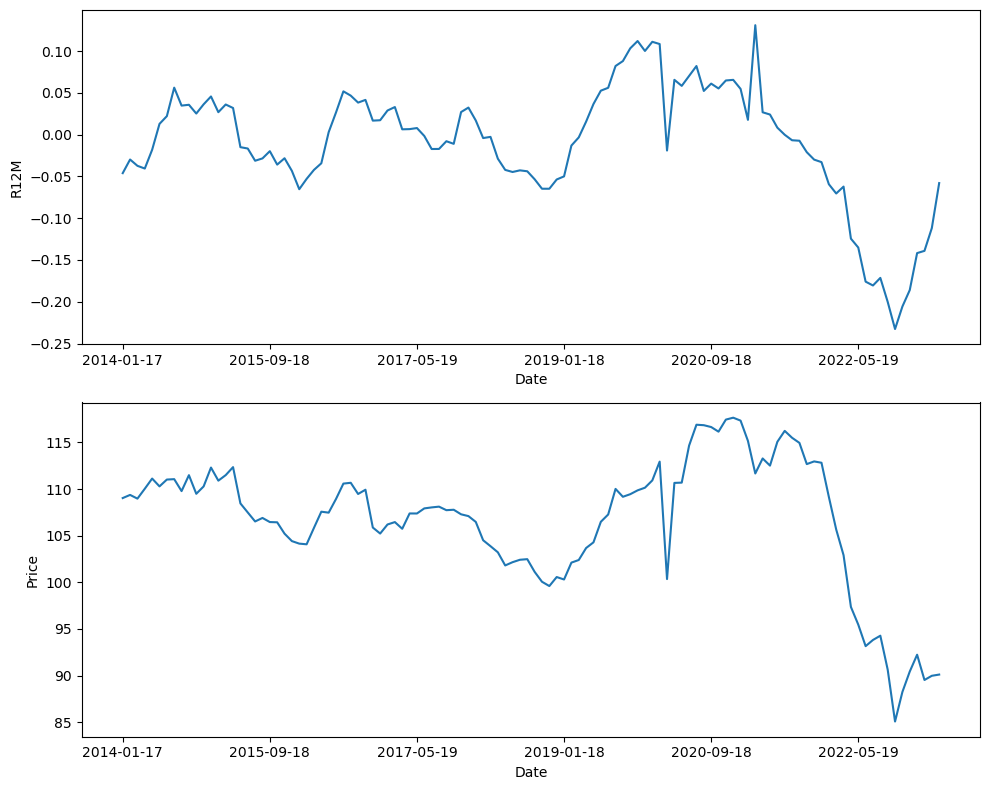

In [46]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

df.groupby('Date')['R12M'].mean().plot(ax=ax1)
ax1.set_ylabel('R12M')

df.groupby('Date')['Price'].mean().plot(ax=ax2)
ax2.set_ylabel('Price')

plt.tight_layout()
plt.show()


In [47]:
df.to_csv('LUACTRUU_cleaned.csv', index=False)
